In [1]:
import json
import glob

def lire_json(chemin):
    with open(chemin, "r", encoding="utf-8") as fin:
        dic = json.load(fin)
    return dic

def ecrire_json(chemin, dic):
    with open(chemin, "w", encoding="utf-8") as fout:
        fout.write(json.dumps(dic, ensure_ascii=False, indent=2))

In [2]:
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

print(len(dic))

5685


In [37]:
new_dic = {}

for k, v in dic.items():
    mots = []
    tags = []
    for mot, tag in v[1]:
        mots.append(mot)
        tags.append(tag)
    new_dic[k] = []
    new_dic[k].append(mots)
    new_dic[k].append(tags)
    new_dic[k].append(v[0])
    
print(len(new_dic))

for k, v in new_dic.items():
    print(k, v)
    break

5685
french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498 [['Identification', 'de', 'trois', 'gènes', 'expliquant', 'la', 'virulence', 'de', 'la', 'grippe', 'espagnole', 'de', '1918'], ['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], 'Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918']


In [38]:
articles = [x for x in new_dic.keys()]
print(articles[0])

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

french-docs/2009\01\01\20090101_Elmoudjahid_69e98e7fc33abc878f8cfb6bd32fe498
[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [119]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

nb_clusters = 7

model = KMeans(n_clusters=nb_clusters)

V = CountVectorizer()

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])
print(len(X))

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0 1 0 0 4 2 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 0 0 5 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
5685


In [106]:
model.fit(X)

all_predictions = model.predict(X)

print(all_predictions[:100])

[5 1 4 4 2 2 4 2 1 1 3 5 4 2 4 1 1 4 2 4 5 5 4 4 5 4 5 1 1 1 1 0 0 5 1 5 0
 1 2 2 0 0 2 2 1 4 2 4 5 4 4 1 4 4 1 5 5 0 1 5 4 5 1 1 4 4 4 4 2 4 5 2 4 1
 4 5 0 2 1 5 5 5 2 2 5 1 4 4 4 2 0 4 4 5 2 2 2 4 2 2]


In [102]:
dic_res = {}

for i in range(len(X)):
    #print(X[i])
    num_cluster = all_predictions[i]
    titre = liste_titres[i]
    tags = liste_t[i]
    #vecteur = X[i]
    dic_res.setdefault(num_cluster,  [])
    dic_res[num_cluster].append((titre, tags, vecteur))

In [115]:
from random import randint

echantillons = []

taille_echantillons = 5
    
for i in range(nb_clusters):
    echantillons.append([])
    #print(len(dic_res[i]))
    for j in range(taille_echantillons):
        indice = randint(0, len(dic_res[i]))
        #print(indice)
        echantillons[i].append(dic_res[i][indice][:1])

for i in range(len(echantillons)):
    print("Cluster %s : %s articles" % (i, len(dic_res[i])))
    for titre in echantillons[i]:
        print(titre)
    print("-"*10)

Cluster 0 : 1619 articles
('Grippe: 310 000 personnes touchées en deux semaines',)
("Les fils d'exilés reconnus",)
('Plus de 450 nouveaux admis au BTS et DSEP',)
('Soins - Faut-il un Grenelle des hôpitaux ?',)
('Tensions à Jérusalem',)
----------
Cluster 1 : 111 articles
('Les artistes sengagent LOffice national de la famille et de la population (Onfp) a organisé, mercredi, une rencontre avec une pléiade dartistes et communicateurs, dans le cadre de la célébration de la Journée mondiale de lutte contre le sida.',)
('Dépistage précoce pour prévenir les risques LOffice national de la famille et de la population (Onfp) a entamé récemment la 8e session «année 2009» sur le thème «La lutte contre les cancers féminins : un problème de santé publique».',)
("Santé. La dotation du PEPFAR pourra atteindre 48 milliards de dollars pour la période de 2009 à 2013 Au cours des cinq prochaines années, le PEPFAR permettra de soigner au moins trois millions de personnes en Afrique, de prévenir douze mill

In [1]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = V.get_feature_names()

for i in range(nb_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

NameError: name 'model' is not defined

No handles with labels found to put in legend.


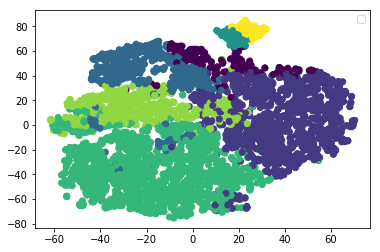

In [120]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model_tsne = TSNE(learning_rate=100)

# Fitting Model
transformed = model_tsne.fit_transform(X)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]


# à faire : ajouter le numéro de cluster
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.legend()
plt.savefig("test.png")
plt.show()